In [4]:
#Import Libraries
from __future__ import print_function
import torch
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from dataset import get_loader
from transform import get_a_train_transform, get_a_test_transform
from utils import get_device
from utils import compute_mean_std

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [5]:
%load_ext autoreload

In [6]:
%autoreload 2

In [7]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
train_data = datasets.CIFAR10('./data', train=True, download=True)
test_data = datasets.CIFAR10('./data', train=False, download=True)

Files already downloaded and verified
Files already downloaded and verified


In [9]:
# Run only once initially to get mean and std.
# Data statistics
train = datasets.CIFAR10('./data', train=True, download=True, transform=transforms.Compose([transforms.ToTensor()]))

print('[Train]')
print(' - Numpy Shape:', train.data.shape)

mean_, std_ = compute_mean_std(train)
print(' - Mean of 3 channels', mean_)
print(' - Std of 3 channels', std_)


Files already downloaded and verified
[Train]
 - Numpy Shape: (50000, 32, 32, 3)
 - Mean of 3 channels (0.49139968, 0.48215827, 0.44653124)
 - Std of 3 channels (0.24703233, 0.24348505, 0.26158768)


In [9]:
class_map = train_data.class_to_idx
class_map

{'airplane': 0,
 'automobile': 1,
 'bird': 2,
 'cat': 3,
 'deer': 4,
 'dog': 5,
 'frog': 6,
 'horse': 7,
 'ship': 8,
 'truck': 9}

In [10]:
use_cuda, use_mps, device = get_device()

In [11]:
# Train/Test Loader
train_data, test_data, train_loader, test_loader = get_loader(train_data, test_data, get_a_train_transform(), get_a_test_transform(), batch_size=128, use_cuda=use_cuda, use_mps=use_mps)

In [13]:
dataiter = iter(train_loader)
images, labels = next(dataiter)

print('images in batch and shape of an image', images.shape)
print('labels : ', labels.shape)

images in batch and shape of an image torch.Size([128, 3, 32, 32])
labels :  torch.Size([128])


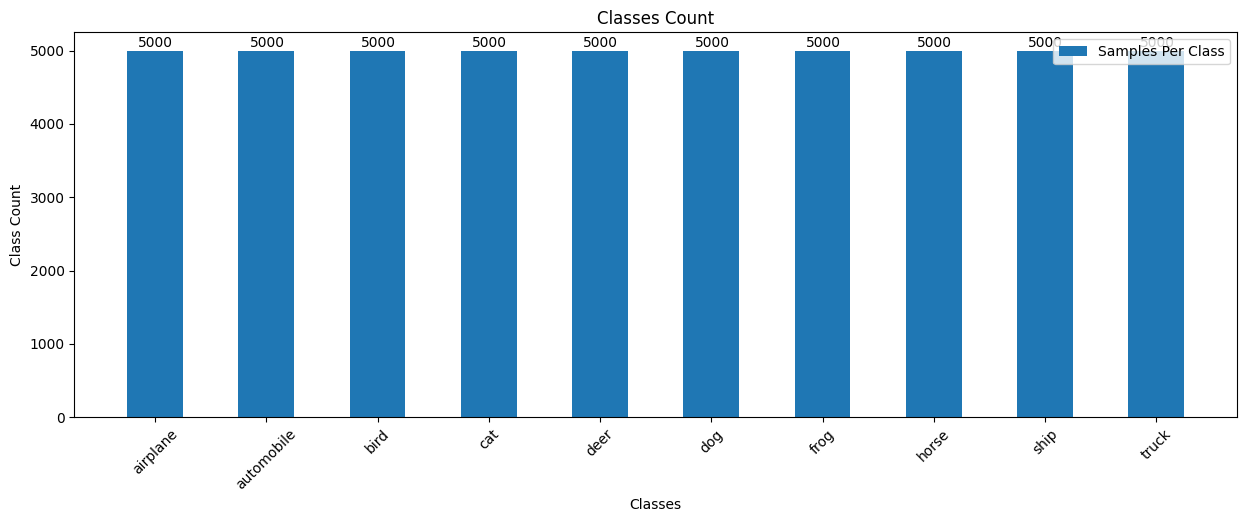

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

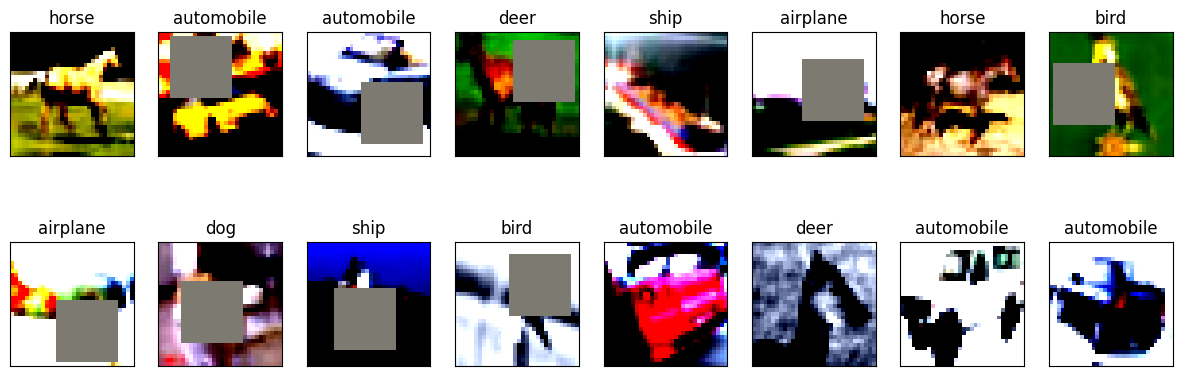

In [14]:
from visualise import print_class_scale, print_samples

torch.manual_seed(1)
show_dataset_analyze = True

if show_dataset_analyze:
    print_class_scale(train_loader, class_map)
    print_samples(train_loader, class_map, count=16)

In [12]:
from model import Cifar10_S9
from utils import model_summary

show_summary = True

model = Cifar10_S9(device, norm="bn").to(device)
if show_summary:
    model_summary(model, (3,32,32))
#Total params: 149,546 After implementing Depthwise params reduced by 8k | implemented in layer 22,23

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             896
              ReLU-2           [-1, 32, 32, 32]               0
       BatchNorm2d-3           [-1, 32, 32, 32]              64
           Dropout-4           [-1, 32, 32, 32]               0
            Conv2d-5           [-1, 64, 32, 32]          18,496
              ReLU-6           [-1, 64, 32, 32]               0
       BatchNorm2d-7           [-1, 64, 32, 32]             128
           Dropout-8           [-1, 64, 32, 32]               0
            Conv2d-9           [-1, 32, 16, 16]          18,464
           Conv2d-10           [-1, 32, 16, 16]           9,248
             ReLU-11           [-1, 32, 16, 16]               0
      BatchNorm2d-12           [-1, 32, 16, 16]              64
          Dropout-13           [-1, 32, 16, 16]               0
           Conv2d-14           [-1, 64,

In [13]:
from model import model_train, model_test

path = "trained_model/cifar10.pth"

optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=23, gamma=0.1, verbose=True)

criterion = F.nll_loss

epochs = 50

for epoch in range(1, epochs+1):
    print("Epoch ", epoch)
    model_train(model, device, train_loader, optimizer, criterion, path)
    model_test(model, device, test_loader, criterion)
    scheduler.step()

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch  1


Train: Loss=1.4569 Batch_id=390 Accuracy=37.30: 100%|██████████| 391/391 [00:40<00:00,  9.60it/s]



Test set: Average loss: 1.3488, Accuracy: 4979/10000 (49.79%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch  2


Train: Loss=1.3741 Batch_id=390 Accuracy=50.37: 100%|██████████| 391/391 [00:39<00:00,  9.85it/s]



Test set: Average loss: 1.2003, Accuracy: 5622/10000 (56.22%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch  3


Train: Loss=1.1344 Batch_id=390 Accuracy=56.32: 100%|██████████| 391/391 [00:39<00:00,  9.83it/s]



Test set: Average loss: 1.0256, Accuracy: 6317/10000 (63.17%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch  4


Train: Loss=1.0560 Batch_id=390 Accuracy=60.92: 100%|██████████| 391/391 [00:39<00:00,  9.84it/s]



Test set: Average loss: 0.9087, Accuracy: 6823/10000 (68.23%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch  5


Train: Loss=0.9239 Batch_id=390 Accuracy=64.07: 100%|██████████| 391/391 [00:39<00:00,  9.83it/s]



Test set: Average loss: 0.7979, Accuracy: 7219/10000 (72.19%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch  6


Train: Loss=0.7454 Batch_id=390 Accuracy=66.31: 100%|██████████| 391/391 [00:39<00:00,  9.83it/s]



Test set: Average loss: 0.7871, Accuracy: 7241/10000 (72.41%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch  7


Train: Loss=0.8920 Batch_id=390 Accuracy=67.79: 100%|██████████| 391/391 [00:39<00:00,  9.85it/s]



Test set: Average loss: 0.7593, Accuracy: 7310/10000 (73.10%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch  8


Train: Loss=1.0600 Batch_id=390 Accuracy=69.16: 100%|██████████| 391/391 [00:39<00:00,  9.83it/s]



Test set: Average loss: 0.6893, Accuracy: 7625/10000 (76.25%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch  9


Train: Loss=0.8641 Batch_id=390 Accuracy=70.49: 100%|██████████| 391/391 [00:39<00:00,  9.83it/s]



Test set: Average loss: 0.6695, Accuracy: 7694/10000 (76.94%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch  10


Train: Loss=0.7961 Batch_id=390 Accuracy=70.95: 100%|██████████| 391/391 [00:39<00:00,  9.80it/s]



Test set: Average loss: 0.6599, Accuracy: 7677/10000 (76.77%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch  11


Train: Loss=0.8950 Batch_id=390 Accuracy=72.08: 100%|██████████| 391/391 [00:39<00:00,  9.82it/s]



Test set: Average loss: 0.6307, Accuracy: 7801/10000 (78.01%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch  12


Train: Loss=0.7773 Batch_id=390 Accuracy=72.69: 100%|██████████| 391/391 [00:39<00:00,  9.83it/s]



Test set: Average loss: 0.6057, Accuracy: 7924/10000 (79.24%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch  13


Train: Loss=0.6044 Batch_id=390 Accuracy=72.94: 100%|██████████| 391/391 [00:39<00:00,  9.82it/s]



Test set: Average loss: 0.6051, Accuracy: 7949/10000 (79.49%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch  14


Train: Loss=0.8929 Batch_id=390 Accuracy=73.62: 100%|██████████| 391/391 [00:39<00:00,  9.83it/s]



Test set: Average loss: 0.5874, Accuracy: 7990/10000 (79.90%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch  15


Train: Loss=0.4694 Batch_id=390 Accuracy=74.37: 100%|██████████| 391/391 [00:39<00:00,  9.82it/s]



Test set: Average loss: 0.5840, Accuracy: 7988/10000 (79.88%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch  16


Train: Loss=0.6112 Batch_id=390 Accuracy=74.97: 100%|██████████| 391/391 [00:39<00:00,  9.81it/s]



Test set: Average loss: 0.5626, Accuracy: 8102/10000 (81.02%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch  17


Train: Loss=0.5486 Batch_id=390 Accuracy=75.19: 100%|██████████| 391/391 [00:39<00:00,  9.83it/s]



Test set: Average loss: 0.5882, Accuracy: 7975/10000 (79.75%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch  18


Train: Loss=0.5796 Batch_id=390 Accuracy=75.62: 100%|██████████| 391/391 [00:39<00:00,  9.82it/s]



Test set: Average loss: 0.5667, Accuracy: 8065/10000 (80.65%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch  19


Train: Loss=0.5866 Batch_id=390 Accuracy=76.09: 100%|██████████| 391/391 [00:39<00:00,  9.83it/s]



Test set: Average loss: 0.5589, Accuracy: 8091/10000 (80.91%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch  20


Train: Loss=0.5213 Batch_id=390 Accuracy=76.21: 100%|██████████| 391/391 [00:39<00:00,  9.82it/s]



Test set: Average loss: 0.5420, Accuracy: 8153/10000 (81.53%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch  21


Train: Loss=0.7673 Batch_id=390 Accuracy=76.53: 100%|██████████| 391/391 [00:39<00:00,  9.81it/s]



Test set: Average loss: 0.5187, Accuracy: 8213/10000 (82.13%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch  22


Train: Loss=0.6961 Batch_id=390 Accuracy=77.00: 100%|██████████| 391/391 [00:39<00:00,  9.81it/s]



Test set: Average loss: 0.5141, Accuracy: 8276/10000 (82.76%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch  23


Train: Loss=0.4597 Batch_id=390 Accuracy=77.00: 100%|██████████| 391/391 [00:39<00:00,  9.83it/s]



Test set: Average loss: 0.5016, Accuracy: 8280/10000 (82.80%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch  24


Train: Loss=0.6337 Batch_id=390 Accuracy=79.10: 100%|██████████| 391/391 [00:39<00:00,  9.81it/s]



Test set: Average loss: 0.4641, Accuracy: 8410/10000 (84.10%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch  25


Train: Loss=0.6092 Batch_id=390 Accuracy=79.65: 100%|██████████| 391/391 [00:39<00:00,  9.82it/s]



Test set: Average loss: 0.4630, Accuracy: 8418/10000 (84.18%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch  26


Train: Loss=0.7726 Batch_id=390 Accuracy=80.09: 100%|██████████| 391/391 [00:39<00:00,  9.82it/s]



Test set: Average loss: 0.4565, Accuracy: 8454/10000 (84.54%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch  27


Train: Loss=0.6346 Batch_id=390 Accuracy=80.07: 100%|██████████| 391/391 [00:39<00:00,  9.81it/s]



Test set: Average loss: 0.4535, Accuracy: 8450/10000 (84.50%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch  28


Train: Loss=0.5998 Batch_id=390 Accuracy=80.11: 100%|██████████| 391/391 [00:39<00:00,  9.81it/s]



Test set: Average loss: 0.4496, Accuracy: 8462/10000 (84.62%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch  29


Train: Loss=0.6998 Batch_id=390 Accuracy=80.15: 100%|██████████| 391/391 [00:39<00:00,  9.82it/s]



Test set: Average loss: 0.4546, Accuracy: 8447/10000 (84.47%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch  30


Train: Loss=0.3960 Batch_id=390 Accuracy=80.36: 100%|██████████| 391/391 [00:39<00:00,  9.83it/s]



Test set: Average loss: 0.4463, Accuracy: 8483/10000 (84.83%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch  31


Train: Loss=0.5712 Batch_id=390 Accuracy=80.42: 100%|██████████| 391/391 [00:39<00:00,  9.83it/s]



Test set: Average loss: 0.4486, Accuracy: 8480/10000 (84.80%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch  32


Train: Loss=0.4758 Batch_id=390 Accuracy=80.50: 100%|██████████| 391/391 [00:39<00:00,  9.82it/s]



Test set: Average loss: 0.4470, Accuracy: 8493/10000 (84.93%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch  33


Train: Loss=0.5767 Batch_id=390 Accuracy=80.80: 100%|██████████| 391/391 [00:39<00:00,  9.78it/s]



Test set: Average loss: 0.4448, Accuracy: 8519/10000 (85.19%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch  34


Train: Loss=0.5143 Batch_id=390 Accuracy=80.37: 100%|██████████| 391/391 [00:39<00:00,  9.83it/s]



Test set: Average loss: 0.4456, Accuracy: 8492/10000 (84.92%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch  35


Train: Loss=0.6016 Batch_id=390 Accuracy=80.94: 100%|██████████| 391/391 [00:39<00:00,  9.80it/s]



Test set: Average loss: 0.4463, Accuracy: 8508/10000 (85.08%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch  36


Train: Loss=0.5388 Batch_id=390 Accuracy=80.83: 100%|██████████| 391/391 [00:40<00:00,  9.77it/s]



Test set: Average loss: 0.4453, Accuracy: 8487/10000 (84.87%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch  37


Train: Loss=0.6502 Batch_id=390 Accuracy=81.12: 100%|██████████| 391/391 [00:40<00:00,  9.72it/s]



Test set: Average loss: 0.4445, Accuracy: 8488/10000 (84.88%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch  38


Train: Loss=0.7766 Batch_id=390 Accuracy=80.82: 100%|██████████| 391/391 [00:40<00:00,  9.70it/s]



Test set: Average loss: 0.4426, Accuracy: 8507/10000 (85.07%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch  39


Train: Loss=0.4845 Batch_id=390 Accuracy=80.88: 100%|██████████| 391/391 [00:40<00:00,  9.70it/s]



Test set: Average loss: 0.4370, Accuracy: 8519/10000 (85.19%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch  40


Train: Loss=0.3606 Batch_id=390 Accuracy=80.79: 100%|██████████| 391/391 [00:40<00:00,  9.74it/s]



Test set: Average loss: 0.4417, Accuracy: 8500/10000 (85.00%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch  41


Train: Loss=0.5541 Batch_id=390 Accuracy=80.85: 100%|██████████| 391/391 [00:39<00:00,  9.78it/s]



Test set: Average loss: 0.4373, Accuracy: 8528/10000 (85.28%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch  42


Train: Loss=0.5460 Batch_id=390 Accuracy=80.82: 100%|██████████| 391/391 [00:40<00:00,  9.73it/s]



Test set: Average loss: 0.4312, Accuracy: 8538/10000 (85.38%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch  43


Train: Loss=0.6121 Batch_id=390 Accuracy=81.03: 100%|██████████| 391/391 [00:40<00:00,  9.74it/s]



Test set: Average loss: 0.4344, Accuracy: 8518/10000 (85.18%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch  44


Train: Loss=0.6014 Batch_id=390 Accuracy=81.03: 100%|██████████| 391/391 [00:40<00:00,  9.76it/s]



Test set: Average loss: 0.4347, Accuracy: 8526/10000 (85.26%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch  45


Train: Loss=0.5999 Batch_id=390 Accuracy=81.23: 100%|██████████| 391/391 [00:40<00:00,  9.75it/s]



Test set: Average loss: 0.4321, Accuracy: 8541/10000 (85.41%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch  46


Train: Loss=0.6334 Batch_id=390 Accuracy=81.04: 100%|██████████| 391/391 [00:40<00:00,  9.73it/s]



Test set: Average loss: 0.4396, Accuracy: 8526/10000 (85.26%)

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch  47


Train: Loss=0.5825 Batch_id=390 Accuracy=81.17: 100%|██████████| 391/391 [29:47<00:00,  4.57s/it]  



Test set: Average loss: 0.4326, Accuracy: 8542/10000 (85.42%)

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch  48


Train: Loss=0.6574 Batch_id=390 Accuracy=81.18: 100%|██████████| 391/391 [00:39<00:00,  9.81it/s]



Test set: Average loss: 0.4347, Accuracy: 8520/10000 (85.20%)

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch  49


Train: Loss=0.5166 Batch_id=390 Accuracy=81.43: 100%|██████████| 391/391 [00:40<00:00,  9.77it/s]



Test set: Average loss: 0.4301, Accuracy: 8535/10000 (85.35%)

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch  50


Train: Loss=0.3679 Batch_id=390 Accuracy=81.62: 100%|██████████| 391/391 [00:40<00:00,  9.77it/s]



Test set: Average loss: 0.4287, Accuracy: 8537/10000 (85.37%)

Adjusting learning rate of group 0 to 1.0000e-04.


In [16]:
torch.save(model.state_dict(), "trained_model/cifar10_.pth")

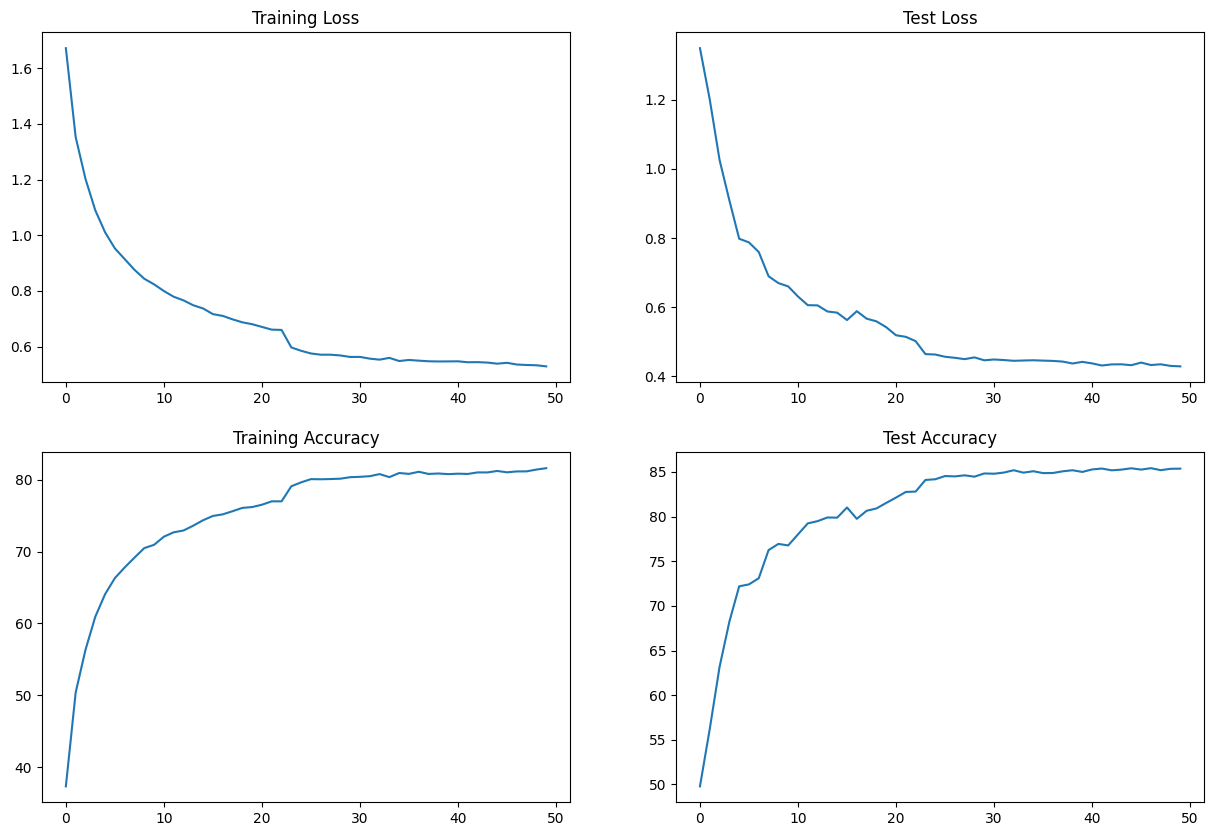

In [17]:
from visualise import draw_graphs
draw_graphs()

Confusion matrix, without normalization


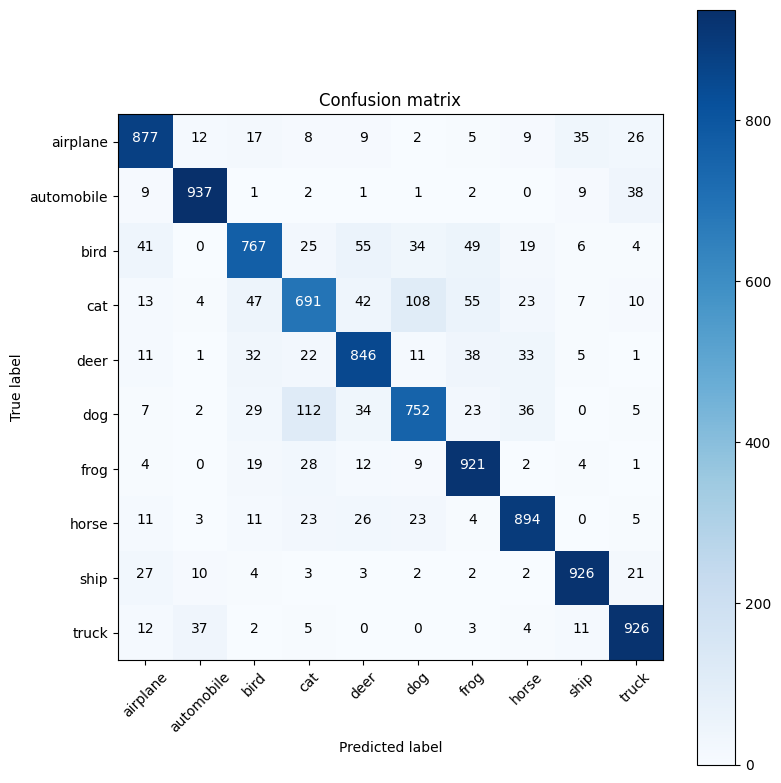

In [22]:
from utils import prepare_confusion_matrix, get_all_predictions
from visualise import plot_confusion_matrix

all_preds, all_targets = get_all_predictions(model, test_loader, device)
confusion_matrix = prepare_confusion_matrix(all_preds, all_targets, class_map)
plot_confusion_matrix(confusion_matrix, class_map, False)

In [18]:
from utils import get_incorrrect_predictions, load_weights_from_path

model = load_weights_from_path(model, "trained_model/cifar10_.pth")

incorrect = get_incorrrect_predictions(model, test_loader, device)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

Total Incorrect Predictions 1463


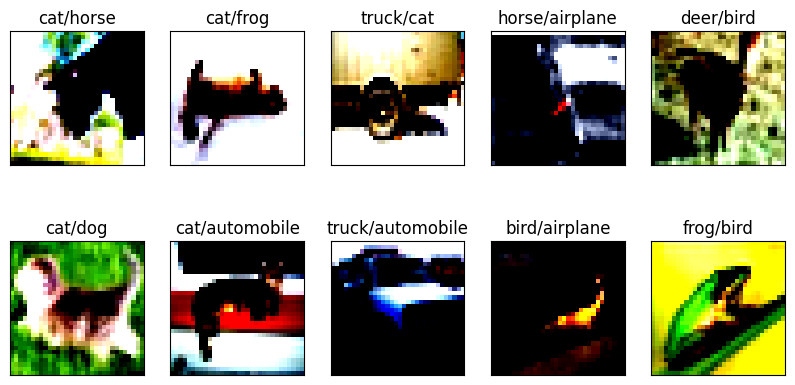

In [19]:
from visualise import plot_incorrect_predictions

labels_mapping = {idx:cls for cls, idx in class_map.items()}
plot_incorrect_predictions(incorrect, labels_mapping, 10)